# BlueQubit hackathon. Task 2.

Here the circuit is bigger than 36 quibts (maximum for GPU device).
I found that 6 qubits can be measured earlier and then can be reused. Below is the schematic of the circuit reorganization.
The initial circuit can be represented as follows:
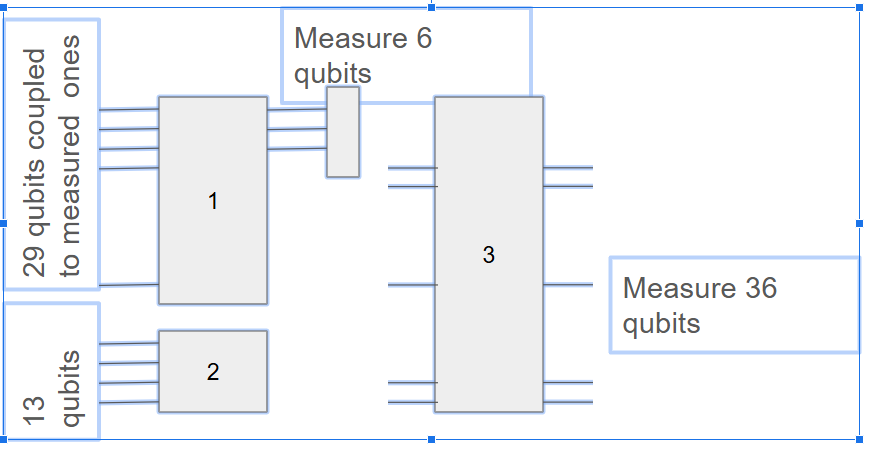
The reorgainized circuit has only 36 quibits and can be run on GPUs.
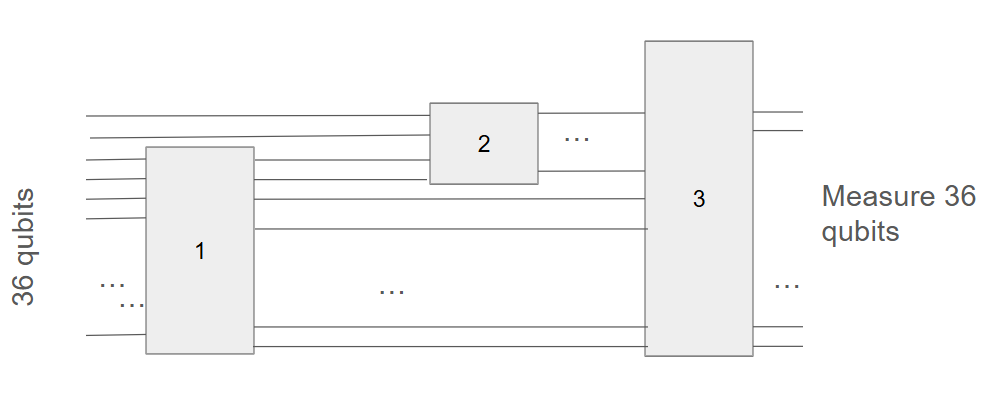

The 6 quibits are coupled to other but not all the quibit. So, we can run that part of the circuit and get 6 bits of the bitstring. THey all |0>, making reorganization easier.
Then I reorginize the circuit and run it on GPUs.


There is a special function below that get the graph of coupling. This allows to include all necessary quibit when we try to measure first 6 ones.


In [9]:
#importing libraries
import numpy as np
import time
import sys
import math

import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile



In [10]:
#load circuit from a file
import qiskit.qasm2
 
q = qiskit.qasm2.load("circuit_2_42q.qasm")

In [11]:
#q.draw('mpl')

Total number of gates: 3155

Measurement order: 33 24 23 7 

In [12]:
#counting gates and finding the last gate nuber for a given qubit and finding the last 2-qubit gate
#This function allow to find the qubits that are measured earlier.
q_num = [33, 24, 23, 7, 13, 2] #6 gates measure earlier
gate_num, gate_count, gate_position, double_qubit_gates_number = gates_counting_func(q, q_num)

Total number of gates: 3155
Number of gates with qubits in q_num: 281
Gates positions: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 32, 33, 34, 35, 36, 37, 38, 69, 70, 71, 72, 73, 74, 81, 82, 83, 84, 85, 86, 87, 93, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 130, 137, 138, 139, 140, 141, 170, 171, 172, 173, 174, 175, 176, 177, 194, 201, 202, 203, 204, 205, 206, 213, 214, 215, 216, 217, 224, 225, 226, 227, 228, 289, 290, 291, 292, 293, 294, 295, 365, 366, 367, 368, 369, 370, 868, 869, 870, 871, 872, 894, 895, 896, 897, 898, 899, 900, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1127, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1193, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1214, 1215, 1216, 1217, 1218, 1219, 1250, 1258, 1259, 1260, 1261, 1262, 1263, 1271, 1272, 1273, 1274, 1275, 1276, 1277,

In [13]:
#some intermediate variable
last_double_gate_position = gate_position[double_qubit_gates_number[len(double_qubit_gates_number)-1]]
print('Last double gate position: ' + str(last_double_gate_position))
last_double_gate_poistion_for_qubit = double_qubit_gates_number[len(double_qubit_gates_number)-1]
print('Last double gate position in the list for give qubits: ' + str(last_double_gate_poistion_for_qubit))

Last double gate position: 1685
Last double gate position in the list for give qubits: 240


In [14]:
#Reorder gates to make measurements earlier.
#All single gates for 6 quibits are moved closer to their last 2-quibt gate.
counter = 0
for i in range(last_double_gate_poistion_for_qubit + 1, gate_count):
    main_circ_gate_num = gate_position[i]
    #print(main_circ_gate_num)
    insert_position = last_double_gate_position + 1 + counter
    counter = counter + 1
    #print(insert_position)
    inst = q.data[main_circ_gate_num]
    del q.data[main_circ_gate_num]
    q.data.insert(insert_position, inst)

In [15]:
#Saving reordered circuit
qc_full_reordered = QuantumCircuit(42,42)
qc_full_reordered = q

In [16]:
#Checjing if we still have the same number of gates (no errors)
gate_num_reord, gate_count_reord, gate_position_reord, double_qubit_gates_number_reord = gates_counting_func(qc_full_reordered, q_num)

Total number of gates: 3155
Number of gates with qubits in q_num: 281
Gates positions: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 32, 33, 34, 35, 36, 37, 38, 69, 70, 71, 72, 73, 74, 81, 82, 83, 84, 85, 86, 87, 93, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 130, 137, 138, 139, 140, 141, 170, 171, 172, 173, 174, 175, 176, 177, 194, 201, 202, 203, 204, 205, 206, 213, 214, 215, 216, 217, 224, 225, 226, 227, 228, 289, 290, 291, 292, 293, 294, 295, 365, 366, 367, 368, 369, 370, 868, 869, 870, 871, 872, 894, 895, 896, 897, 898, 899, 900, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1127, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1193, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1214, 1215, 1216, 1217, 1218, 1219, 1250, 1258, 1259, 1260, 1261, 1262, 1263, 1271, 1272, 1273, 1274, 1275, 1276, 1277,

In [17]:
#Getting a circuit showed in the picture above as 1 and 2,=. 
qc_1_and_2 = QuantumCircuit(42,42)
for i in range(gate_position_reord[len(gate_position_reord)-1]+1):
    qc_1_and_2.append(qc_full_reordered.data[i], qc_1_and_2.qubits, qc_1_and_2.clbits)
#new_qc.draw('mpl')    

In [18]:
#Check number of gates
gate_num_1_and_2, gate_count_1_and_2, gate_position_1_and_2, double_qubit_gates_number_1_and_2 = gates_counting_func(qc_1_and_2, q_num)

Total number of gates: 1726
Number of gates with qubits in q_num: 281
Gates positions: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 32, 33, 34, 35, 36, 37, 38, 69, 70, 71, 72, 73, 74, 81, 82, 83, 84, 85, 86, 87, 93, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 130, 137, 138, 139, 140, 141, 170, 171, 172, 173, 174, 175, 176, 177, 194, 201, 202, 203, 204, 205, 206, 213, 214, 215, 216, 217, 224, 225, 226, 227, 228, 289, 290, 291, 292, 293, 294, 295, 365, 366, 367, 368, 369, 370, 868, 869, 870, 871, 872, 894, 895, 896, 897, 898, 899, 900, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1127, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1193, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1214, 1215, 1216, 1217, 1218, 1219, 1250, 1258, 1259, 1260, 1261, 1262, 1263, 1271, 1272, 1273, 1274, 1275, 1276, 1277,

In [19]:
#Getting circuit shown as 3 in the picture above.
qc_3 = QuantumCircuit(42,42)
for i in range(gate_position_reord[len(gate_position_reord)-1]+1, 3155):
    qc_3.append(qc_full_reordered.data[i], qc_3.qubits, qc_3.clbits)
#new_qc.draw('mpl') 

In [20]:
#Check number of gates
gates_counting_func(qc_3, q_num)

Total number of gates: 1429
Number of gates with qubits in q_num: 0
Gates positions: []
Positions of double gates : []


(1429, 0, [], [])

In [21]:
#Creating a graph of connections between measured qubits and other qubits inside circuit 1+2
V = 42
adj = [[] for i in range(V+1)]
for gate in qc_1_and_2.data:
     #print('\ngate name:', gate[0].name)
     bb = gate[1]
     #print('qubit(s) acted on:', bb[0]._index)
     if len(bb) > 1:
        #print('qubit(s) acted on:', bb[1]._index)
        addEdge(bb[0]._index, bb[1]._index)

for i in range(42):
    addEdge(i, i)

list_of_conn = []
for q_n in range(42):
    for u in range(q_n,q_n+1):
        for v in range(1,42):
            if (isReachable(u, v)):
                #print("There is a path from",u,"to",v)
                list_of_conn.append(u)
                list_of_conn.append(v)
            else:
                aa = 1
                #print("There is no path from",u,"to",v)
list_of_conn = list(set(list_of_conn))
print(list_of_conn)
print(len(list_of_conn))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
42


In [22]:
#Making lists of qubits in various circuitc
circ_1_qubits_list = [0, 1, 2, 3, 4, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 29, 33, 34, 35, 39, 41]
meas_qubit_list = [33, 24, 23, 7, 13, 2] 
full_list = range(42)
circuit_2_list = []
circuit_2_list[:] = full_list[:]
circuit_3_list = []
circuit_3_list[:] = full_list[:]
for i in circ_1_qubits_list:
    circuit_2_list.remove(i)
print('Circuit 1 qubits list:' + str(circ_1_qubits_list))

print('Circuit 2 qubits list:' + str(circuit_2_list))
for i in meas_qubit_list:
    circuit_3_list.remove(i)
print('Circuit 3 qubits list:' + str(circuit_3_list))
print('Measured qubits list:' + str(meas_qubit_list))

Circuit 1 qubits list:[0, 1, 2, 3, 4, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 29, 33, 34, 35, 39, 41]
Circuit 2 qubits list:[5, 9, 10, 27, 28, 30, 31, 32, 36, 37, 38, 40]
Circuit 3 qubits list:[0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41]
Measured qubits list:[33, 24, 23, 7, 13, 2]


In [23]:
#Getting circuit denoted as 1 in figure above
qc_1 = QuantumCircuit(42,42)
q_num_list = circ_1_qubits_list
current_gate_number = 0
for gate in qc_1_and_2.data:
    gg = gate[0]
    bb = gate[1]
    if len(bb) < 2:
        q1 = bb[0]._index
        if q1 in q_num_list:
            qc_1.append(qc_1_and_2.data[current_gate_number])
            gate_position.append(current_gate_number)
            
    else:
        q1 = bb[0]._index
        q2 = bb[1]._index
        if q1 in q_num_list or q2 in q_num_list:
            qc_1.append(qc_1_and_2.data[current_gate_number])
            gate_position.append(current_gate_number)
            
    current_gate_number = current_gate_number + 1
#There are 30 qubits that are used here. Ther rest was cut.
#The circuit was run in a different notebook. All 6 measured qubits were at |0> state

In [24]:
#Checking number of gates
gate_num_1, gate_count_1, gate_position_1, double_qubit_gates_number_1 = gates_counting_func(qc_1, circuit_2_list)

Total number of gates: 1275
Number of gates with qubits in q_num: 0
Gates positions: []
Positions of double gates : []


In [25]:
#Making circuit 2
qc_2 = QuantumCircuit(42,42)
q_num_list = circuit_2_list
current_gate_number = 0
for gate in qc_1_and_2.data:
    gg = gate[0]
    bb = gate[1]
    if len(bb) < 2:
        q1 = bb[0]._index
        if q1 in q_num_list:
            qc_2.append(qc_1_and_2.data[current_gate_number])
            gate_position.append(current_gate_number)
            
    else:
        q1 = bb[0]._index
        q2 = bb[1]._index
        if q1 in q_num_list or q2 in q_num_list:
            qc_2.append(qc_1_and_2.data[current_gate_number])
            gate_position.append(current_gate_number)
            
    current_gate_number = current_gate_number + 1

In [26]:
#Checking number of gates
gate_num_2, gate_num_2, gate_position_2, double_qubit_gates_number_2 = gates_counting_func(qc_2, circ_1_qubits_list)

Total number of gates: 451
Number of gates with qubits in q_num: 0
Gates positions: []
Positions of double gates : []


In [27]:
#Joining circuits 2 and 3
qc_2_and_3 = QuantumCircuit(42,42)
qc_2_and_3.append(qc_2,qc_2_and_3.qubits,qc_2_and_3.clbits)
qc_2_and_3.append(qc_3,qc_2_and_3.qubits,qc_2_and_3.clbits)

In [28]:
#Checking number of gates
gate_num_23, gate_num_23, gate_position_23, double_qubit_gates_number_23 = gates_counting_func(qc_2_and_3.decompose(), q_num)

Total number of gates: 1880
Number of gates with qubits in q_num: 0
Gates positions: []
Positions of double gates : []


In [29]:
#Removing measuring blocks from circuit 1, since GPU does not support mid-circuit measurement. We know all 6 qubits in |0> state 
counter = 0
for gate in qc_1.data:
    if gate[0]._name == 'measure':
        del qc_1.data[counter]
        print(counter)
    counter = counter + 1
counter = 0
for gate in qc_1.data:
    if gate[0]._name == 'measure':
        del qc_1.data[counter]
        print(counter)
    counter = counter + 1
counter = 0
for gate in qc_1.data:
    if gate[0]._name == 'measure':
        del qc_1.data[counter]
        print(counter)
    counter = counter + 1

1269
1270
1271
1269
1270
1269


In [30]:
#Check number of gates
gate_num_1, gate_count_1, gate_position_1, double_qubit_gates_number_1 = gates_counting_func(qc_1, circuit_2_list)

Total number of gates: 1269
Number of gates with qubits in q_num: 0
Gates positions: []
Positions of double gates : []


In [31]:
#Reoganizing qubits in circuit 1 to have just 36 qubits in the final circuit
from qiskit.qasm2 import dumps
qasm_str = dumps(qc_1)
#print(qasm_str)
qasm_str1 = qasm_str.replace('q[33]','q[5]')
qasm_str2 = qasm_str1.replace('q[24]','q[9]')
qasm_str3 = qasm_str2.replace('q[23]','q[10]')
qasm_str4 = qasm_str3.replace('q[7]','q[27]')
qasm_str5 = qasm_str4.replace('q[13]','q[28]')
qasm_str6 = qasm_str5.replace('q[2]','q[30]')

str_sx = '\ngate sx q1 {U(1.57079632679, 0, 0) q1;}\n\n'
index = qasm_str6.find('qreg q[42];')
qasm_str7 = qasm_str6[:index] + str_sx + qasm_str6[index:]

#print(qasm_str7)

qc_1_swapped = QuantumCircuit(42,42)
qc_1_swapped = qiskit.qasm2.loads(qasm_str7)

In [32]:
#qc_1_swapped.draw('mpl')

In [33]:
#Creating the final circuit with only 36 used qubits.
qc_1_2_3 = QuantumCircuit(42,42)
qc_1_2_3.append(qc_1_swapped,qc_1_2_3.qubits,qc_1_2_3.clbits)
qc_1_2_3.append(qc_2,qc_1_2_3.qubits,qc_1_2_3.clbits)
qc_1_2_3.append(qc_3,qc_1_2_3.qubits,qc_1_2_3.clbits)
qc_fin = qc_1_2_3.decompose()

In [34]:
#Check number of gates
gate_num_1, gate_count_1, gate_position_1, double_qubit_gates_number_1 = gates_counting_func(qc_1_2_3.decompose(), [14])

Total number of gates: 3149
Number of gates with qubits in q_num: 51
Gates positions: [85, 86, 87, 88, 89, 198, 199, 200, 201, 202, 203, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 2475, 2511, 2512, 2513, 2514, 2515, 2516, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2654, 2655, 2656, 2657, 2658, 3124]
Positions of double gates : [5, 11, 24, 30, 37, 44]


In [35]:
list_1 = []
list_1[:] = full_list[:]
for i in q_num:
    list_1.remove(i)
len(list_1)

36

In [36]:
#Removing unused qubits from the final circuit
qasm_str8 = dumps(qc_fin)
#print(qasm_str8)
for i in range(42):
    if i > 2 and i < 7:
        strs = 'q[' + str(i) + ']'
        strs1 = 'q[' + str(i-1) + ']'
        qasm_str8 = qasm_str8.replace(strs,strs1)
        strs = 'c[' + str(i) + ']'
        strs1 = 'c[' + str(i-1) + ']'
        qasm_str8 = qasm_str8.replace(strs,strs1)
    if i > 7 and i < 13:
        strs = 'q[' + str(i) + ']'
        strs1 = 'q[' + str(i-2) + ']'
        qasm_str8 = qasm_str8.replace(strs,strs1)
        strs = 'c[' + str(i) + ']'
        strs1 = 'c[' + str(i-2) + ']'
        qasm_str8 = qasm_str8.replace(strs,strs1)
    if i > 13 and i < 23:
        strs = 'q[' + str(i) + ']'
        strs1 = 'q[' + str(i-3) + ']'
        qasm_str8 = qasm_str8.replace(strs,strs1)
        strs = 'c[' + str(i) + ']'
        strs1 = 'c[' + str(i-3) + ']'
        qasm_str8 = qasm_str8.replace(strs,strs1)
    if i == 24:
        strs = 'q[' + str(i) + ']'
        strs1 = 'q[' + str(i-4) + ']'
        qasm_str8 = qasm_str8.replace(strs,strs1)
        strs = 'c[' + str(i) + ']'
        strs1 = 'c[' + str(i-4) + ']'
        qasm_str8 = qasm_str8.replace(strs,strs1)
    if i > 24 and i < 33:
        strs = 'q[' + str(i) + ']'
        strs1 = 'q[' + str(i-5) + ']'
        qasm_str8 = qasm_str8.replace(strs,strs1)
        strs = 'c[' + str(i) + ']'
        strs1 = 'c[' + str(i-5) + ']'
        qasm_str8 = qasm_str8.replace(strs,strs1)
    if i > 33 and i < 42:
        strs = 'q[' + str(i) + ']'
        strs1 = 'q[' + str(i-6) + ']'
        qasm_str8 = qasm_str8.replace(strs,strs1)
        strs = 'c[' + str(i) + ']'
        strs1 = 'c[' + str(i-6) + ']'
        qasm_str8 = qasm_str8.replace(strs,strs1)
qasm_str8 = qasm_str8.replace('qreg q[42];','qreg q[36];')
qasm_str8 = qasm_str8.replace('creg c[42];','creg c[36];')

str_sx = '\ngate sx q1 {U(1.57079632679, 0, 0) q1;}\n\n'
index = qasm_str8.find('qreg q[36];')
qasm_str8 = qasm_str8[:index] + str_sx + qasm_str8[index:]

#print(qasm_str8)
qc_fin_fin = qiskit.qasm2.loads(qasm_str8)


In [37]:
#qc_fin_fin.draw('mpl')

In [38]:
#Run the circuit on BlueQubit GPUs
import bluequbit
from qiskit.visualization import plot_histogram
bq = bluequbit.init("ifvQUoJTa445RywgR6thzt5D2dCtAezL")
result = bq.run(qc_fin_fin, device='gpu')
counts = result.get_counts()
#plot_histogram(counts, title = 'results')

BQ-PYTHON-SDK - WARNING - Beta version 0.8.3b1 of BlueQubit Python SDK is being used.
BQ-PYTHON-SDK - INFO - Submitted: Job ID: RvPII52PehpOC2Gv, device: gpu, run status: RUNNING, created on: 2024-10-26 23:36:40 UTC, estimated runtime: 105289 ms, estimated cost: $1.41, num qubits: 36


In [39]:
#Getting the most probable bit string
for dic in counts:
    if counts[dic] > 0.12:
        ans = dic
print(ans)
print(counts[ans])

111110011010111001101000011100111111
0.1479993313550949


In [ ]:
111110011010111001101000011100111111
0.1479993313550949


In [40]:
ans

'111110011010111001101000011100111111'

In [8]:
#counting gates and finding the last gate number for a given qubit and finding the last 2-qubit gate
def gates_counting_func(qc, q_num):
    gate_count = 0
    gate_num = 0
    gate_position = []
    double_qubit_gates_number = []
    for gate in qc.data:
        gg = gate[0]
        bb = gate[1]
        if len(bb) < 2:
            q1 = bb[0]._index
            if q1 in q_num:
                gate_count = gate_count + 1
                gate_position.append(gate_num)
        else:
            q1 = bb[0]._index
            q2 = bb[1]._index
            if q1 in q_num or q2 in q_num:
                gate_count = gate_count + 1
                gate_position.append(gate_num)
                double_qubit_gates_number.append(gate_count - 1)
        gate_num = gate_num + 1

    print('Total number of gates: ' + str(gate_num))
    print('Number of gates with qubits in q_num: ' + str(gate_count))
    print('Gates positions: ' + str(gate_position))
    print('Positions of double gates : ' + str(double_qubit_gates_number))
    return gate_num, gate_count, gate_position, double_qubit_gates_number

In [7]:

def count_gates(qc: QuantumCircuit):
    gate_count = {qubit: 0 for qubit in qc.qubits}
    for gate in qc.data:
        for qubit in gate.qubits:
            gate_count[qubit] += 1
    return gate_count

def remove_unused_wires(qc: QuantumCircuit):
    gate_count = count_gates(qc)
    for qubit, count in gate_count.items():
        if count == 0:
            qc.qubits.remove(qubit)
    return qc

In [6]:
# Python3 program to check if there is exist a path between
# two vertices of an undirected graph.
from collections import deque
def addEdge(v, w):
    global adj
    adj[v].append(w)
    adj[w].append(v)
 
# A BFS based function to check whether d is reachable from s.
def isReachable(s, d):
     
    # Base case
    if (s == d):
        return True
 
    # Mark all the vertices as not visited
    visited = [False for i in range(V)]
 
    # Create a queue for BFS
    queue = deque()
 
    # Mark the current node as visited and enqueue it
    visited[s] = True
    queue.append(s)
 
    while (len(queue) > 0):
       
        # Dequeue a vertex from queue and print
        s = queue.popleft()
        # queue.pop_front()
 
        # Get all adjacent vertices of the dequeued vertex s
        # If a adjacent has not been visited, then mark it
        # visited  and enqueue it
        for i in adj[s]:
 
            # If this adjacent node is the destination node,
            # then return true
            if (i == d):
                return True
 
            # Else, continue to do BFS
            if (not visited[i]):
                visited[i] = True
                queue.append(i)
    # If BFS is complete without visiting d
    return False
 
